<a href="https://colab.research.google.com/github/kleber293/Metodos_Colab/blob/main/Metodo_do_Ponto_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## METODO DO PONTO MÉDIO
 
O método do ponto médio assim como o método de Euler modificado são métodos de segundo ordem, que acabam se diferenciando em alguns aspectos, enquando o médoto de Euler modificado é a média aritmética entre duas retas o método do ponto médio se utiliza da inclinação da segunda reta aplicado diretamente no ponto $x_0$. Desta forma $y_1$ será
<center>$y_1=y_0+h\cdot g(x_0+\frac{h}{2},\:y_0+\frac{h}{2}\cdot g(x_0,\:y_0)).$</center>
Na qual $g$ é a função da EDO
<center>$f'(x,\:y)=g(x,\:y)$</center>

---

## PROBLEMA PROPOSTO

Traçar uma curva aproximada á EDO abaixo, na qual um dos pontos se encontra em $(0, 1)$
<center> $f'(x,\:y) = x + y$ </center>

---


In [6]:
#@markdown ## Chamando as bibliotecas
import matplotlib.pyplot as mat
import numpy as n

In [7]:
#@markdown ## Definindo as funções que vamos utilizar
def g(x, y):
    FUNCTION = x+y #@param {type:"raw"}  
    return FUNCTION

#@markdown ---

#@markdown * Método de Euler
def euler(x0, y0, h):
    t1 = g(x0, y0)
    y1 = y0 + h*t1
    return y1

#@markdown * Método de Euler Modificado
def euler_modificado(x0, y0, h):
    t1 = g(x0, y0)
    t2 = g(x0+h, y0 + h*t1)
    y1 = y0 + h/2*( t1 + t2 )
    return y1

#@markdown * Método do Ponto Central
def metodo_do_ponto_central(x0, y0, h):
    t1 = g(x0, y0)
    y1 = y0 + h*g(x0+h/2, y0 + h/2*t1)
    return y1

In [8]:
#@markdown ## Definindo as váriaveis do problema com os seus valores iniciais
x = 0 #@param {type:"raw"}
y = 1 #@param {type:"raw"}

x0, y0, y1, y2 =[x], [y], [y], [y]

In [9]:
#@markdown ## Criando uma lista de pontos que a função assume ao percorrer a formula sobre a reta tangente a solução.
QUANTIDADE = 150 #@param {type:"slider", min:0, max:1000, step:10}
PASSO = 0.6 #@param {type:"slider", min:0.01, max:1, step:0.01}

for i in range(QUANTIDADE):
    x0.append(x0[i]+PASSO)
    y0.append(euler(x0[i], y0[i], PASSO))
    y1.append(euler_modificado(x0[i], y1[i], PASSO))
    y2.append(metodo_do_ponto_central(x0[i], y2[i], PASSO))

## CAIXAS DE EXPEÇÃO TIPO GRÁFICOS

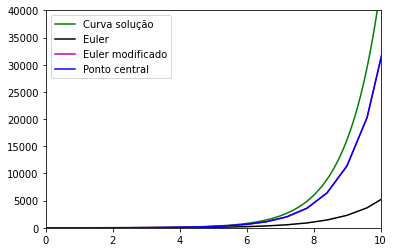

In [10]:
#@markdown ## A nivel de comparação

CURVA_ORIGINAL = True #@param {type:"boolean"}
METODO_DE_EULER = True #@param {type:"boolean"}
METODO_DE_EULER_MODIFICADO = True #@param {type:"boolean"}
METODO_DO_PONTO_CENTRAL = True #@param {type:"boolean"}

mat.ylim(0, 40000)
mat.xlim(0, 10)

if CURVA_ORIGINAL:
    t = n.arange(0, 10, 0.1)
    mat.plot(t, -t-1+2*n.exp(t), color='g', label='Curva solução') # Curva solução (VERDE)

if METODO_DE_EULER:
    mat.plot(x0, y0, color='k', label='Euler') # Curva aproximada, Euler (PRETO)

if METODO_DE_EULER_MODIFICADO:
    mat.plot(x0, y1, color='m', label='Euler modificado') # Curva aproximada, Euler modificado (ROSA)

if METODO_DO_PONTO_CENTRAL:
    mat.plot(x0, y2, color='b', label='Ponto central') # Curva aproximada, Ponto central (AZUL)

mat.legend()
mat.show()